In [1]:
import pandas as pd
import numpy as np
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error
df1 = pd.read_csv('/kaggle/input/dataset/Singapore.csv')
df2 = pd.read_csv('/kaggle/input/dataset/Weekly Dengue Cases (1).csv')

In [2]:
from IPython.display import display
#attribute
print(df1.dtypes)
print(df2.dtypes)

display(df1)
display(df2)

Year                           int64
Week No.                       int64
Daily Rainfall Total (mm)    float64
Mean Temperature (C)         float64
dtype: object
year             int64
eweek            int64
type_dengue     object
number         float64
dtype: object


,Year,Week No.,Daily Rainfall Total (mm),Mean Temperature (C)
0,2012,1,1.839990,27.065217
1,2012,2,3.488352,26.472771
2,2012,3,15.048955,27.200941
3,2012,4,1.376449,26.809944
4,2012,5,8.257399,26.558095
...,...,...,...,...
407,2019,43,11.871970,27.312979
408,2019,44,3.706913,27.973810
409,2019,45,3.619977,28.819872
410,2019,46,2.235376,28.338643


,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0
...,...,...,...,...
525,2018,51,DHF,1.0
526,2018,52,Dengue,160.0
527,2018,52,DHF,0.0
528,2018,53,Dengue,NaN


In [3]:
df2 = pd.read_csv('/kaggle/input/dataset/Weekly Dengue Cases (1).csv')
display(df2)

,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0
...,...,...,...,...
525,2018,51,DHF,1.0
526,2018,52,Dengue,160.0
527,2018,52,DHF,0.0
528,2018,53,Dengue,NaN


In [4]:
#Checking missing variables:

missing_value = ['N/a','na','nan',np.nan]
df2 = pd.read_csv('/kaggle/input/dataset/Weekly Dengue Cases (1).csv', na_values = missing_value)
df1 = pd.read_csv('/kaggle/input/dataset/Singapore.csv', na_values = missing_value)
df2.isnull().sum()
df1.isnull().sum()
#Drop any NaN values
df2 = df2.dropna()
df1 = df1.dropna()

display(df2)

,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0
...,...,...,...,...
523,2018,50,DHF,1.0
524,2018,51,Dengue,127.0
525,2018,51,DHF,1.0
526,2018,52,Dengue,160.0


In [5]:
# Dropping any DHF

df2 = df2[df2["type_dengue"].str.contains("DHF") == False]
df2 = df2.rename(columns={'number': 'Dengue_number'})

# new CSV file

df2.to_csv('New_Dengue_Cases.csv')

#Dataset
df2

,year,eweek,type_dengue,Dengue_number
0,2014,1,Dengue,436.0
2,2014,2,Dengue,479.0
4,2014,3,Dengue,401.0
6,2014,4,Dengue,336.0
8,2014,5,Dengue,234.0
...,...,...,...,...
518,2018,48,Dengue,109.0
520,2018,49,Dengue,113.0
522,2018,50,Dengue,107.0
524,2018,51,Dengue,127.0


In [6]:
# delete all rows with column 'Year' has value below 2014

d1 = df1.drop(df1[df1['Year'] < 2014].index, inplace = True)

# delete all rows with column 'Year' has value above 2018

d1 = df1.drop(df1[df1['Year'] > 2018].index, inplace = True)\

# new CSV file
df1.to_csv('New_Singapore.csv')

df1

,Year,Week No.,Daily Rainfall Total (mm),Mean Temperature (C)
104,2014,1,3.456210,26.592556
105,2014,2,8.061746,26.538159
106,2014,3,0.025827,26.285000
107,2014,4,0.000000,25.810238
108,2014,5,0.000357,26.223190
...,...,...,...,...
360,2018,48,8.713978,27.479643
361,2018,49,8.521088,27.514524
362,2018,50,11.923381,27.171958
363,2018,51,4.726233,28.054615


In [7]:
# Read in the New CLimate CSV file
df4 = pd.read_csv('New_Singapore.csv')
# Read in the New Dengue CSV file
df3 = pd.read_csv('New_Dengue_Cases.csv')
# Select the dengue_number column to append from the second dataframe
column_to_append = df3['Dengue_number']
# Add the columns to the first dataframe
df4['Dengue_number'] = column_to_append
# save the updated dataframe lOCALLY as a new CSV file
df4.to_csv('updated_Singapore.csv', index=False)

#Display new dataset
df5 = pd.read_csv('updated_Singapore.csv')
# check each column has atomic values
for column in df5.columns:
    if not df5[column].apply(lambda x: isinstance(x, (int, float, str))).all():
        print(f'Column {column} is not 1NF')
    else:
        print(f'Column {column} is 1NF')
#display the data types of each attribute
print(df5.dtypes)
display(df5)

Column Unnamed: 0 is 1NF
Column Year is 1NF
Column Week No. is 1NF
Column Daily Rainfall Total (mm) is 1NF
Column Mean Temperature (C) is 1NF
Column Dengue_number is 1NF
Unnamed: 0                     int64
Year                           int64
Week No.                       int64
Daily Rainfall Total (mm)    float64
Mean Temperature (C)         float64
Dengue_number                float64
dtype: object


,Unnamed: 0,Year,Week No.,Daily Rainfall Total (mm),Mean Temperature (C),Dengue_number
0,104,2014,1,3.456210,26.592556,436.0
1,105,2014,2,8.061746,26.538159,479.0
2,106,2014,3,0.025827,26.285000,401.0
3,107,2014,4,0.000000,25.810238,336.0
4,108,2014,5,0.000357,26.223190,234.0
...,...,...,...,...,...,...
256,360,2018,48,8.713978,27.479643,109.0
257,361,2018,49,8.521088,27.514524,113.0
258,362,2018,50,11.923381,27.171958,107.0
259,363,2018,51,4.726233,28.054615,127.0


In [8]:
#Measures Mean(average) of per year ############################
for i in range(2014,2019):
    filtered_df = df5.loc[(df5['Year'] == i)]
    # Calculate the mean of a Rainfall in the filtered dataframe
    Rainfall_mean = statistics.mean(filtered_df['Daily Rainfall Total (mm)'])
    # Calculate the mean of a temperature in the filtered dataframe
    Temperature_mean = statistics.mean(filtered_df['Mean Temperature (C)'])
    # Calculate the mean of a Dengue incidents in the filtered dataframe
    Dengue_mean = statistics.mean(filtered_df['Dengue_number'])
    
    data = {'Year': [i] ,
            'Average Rainfall (mm)': Rainfall_mean,
            'Average Temperature (C)': Temperature_mean,
             'Avergae Dengue Cases': Dengue_mean}
    df = pd.DataFrame(data)
    display(df)

,Year,Average Rainfall (mm),Average Temperature (C),Avergae Dengue Cases
0,2014,5.653466,27.857213,345.396226


,Year,Average Rainfall (mm),Average Temperature (C),Avergae Dengue Cases
0,2015,4.907074,28.112822,216.961538


,Year,Average Rainfall (mm),Average Temperature (C),Avergae Dengue Cases
0,2016,5.960347,28.362796,251.173077


,Year,Average Rainfall (mm),Average Temperature (C),Avergae Dengue Cases
0,2017,7.080943,27.85924,52.884615


,Year,Average Rainfall (mm),Average Temperature (C),Avergae Dengue Cases
0,2018,6.707895,27.823571,62.634615


In [9]:
#Measures Median stat per year ############################
# Calculate the median of the dataset
for i in range(2014,2019):
    filtered_df = df5.loc[(df5['Year'] == i)]
    # Calculate the median of a Rainfall in the filtered dataframe
    Rainfall_median = statistics.median(filtered_df['Daily Rainfall Total (mm)'])
    # Calculate the median of a temperature in the filtered dataframe
    Temperature_median = statistics.median(filtered_df['Mean Temperature (C)'])
    # Calculate the median of a Dengue incidents in the filtered dataframe
    Dengue_median = statistics.median(filtered_df['Dengue_number'])
    
    data = {'Year': [i] ,
            'Median Rainfall (mm)': Rainfall_median,
            'Median Temperature (C)': Temperature_median,
             'Median Dengue Cases': Dengue_median}
    df = pd.DataFrame(data)
    display(df)

,Year,Median Rainfall (mm),Median Temperature (C),Median Dengue Cases
0,2014,5.452107,27.964286,291.0


,Year,Median Rainfall (mm),Median Temperature (C),Median Dengue Cases
0,2015,3.587293,28.121978,225.5


,Year,Median Rainfall (mm),Median Temperature (C),Median Dengue Cases
0,2016,5.05426,28.322957,217.0


,Year,Median Rainfall (mm),Median Temperature (C),Median Dengue Cases
0,2017,6.313049,27.90179,51.0


,Year,Median Rainfall (mm),Median Temperature (C),Median Dengue Cases
0,2018,5.762674,27.832007,56.0


In [10]:
#Measures Mode stat per year ############################
## Mode is the highest occurring value throughout the year
for i in range(2014,2019):
    filtered_df = df5.loc[(df5['Year'] == i)]
    # Calculate the mode of a Rainfall in the filtered dataframe
    Rainfall_mode = statistics.mode(filtered_df['Daily Rainfall Total (mm)'])
    # Calculate the mode of a temperature in the filtered dataframe
    Temperature_mode = statistics.mode(filtered_df['Mean Temperature (C)'])
    # Calculate the mode of a Dengue incidents in the filtered dataframe
    Dengue_mode = statistics.mode(filtered_df['Dengue_number'])
    
    data = {'Year': [i] ,
            'Mode Rainfall (mm)': Rainfall_mode,
            'Mode Temperature (C)': Temperature_mode,
             'Mode Dengue Cases': Dengue_mode}
    df = pd.DataFrame(data)
    display(df)

,Year,Mode Rainfall (mm),Mode Temperature (C),Mode Dengue Cases
0,2014,3.45621,26.592556,186.0


,Year,Mode Rainfall (mm),Mode Temperature (C),Mode Dengue Cases
0,2015,9.109645,26.443537,259.0


,Year,Mode Rainfall (mm),Mode Temperature (C),Mode Dengue Cases
0,2016,0.843239,28.517959,219.0


,Year,Mode Rainfall (mm),Mode Temperature (C),Mode Dengue Cases
0,2017,3.244902,27.821526,51.0


,Year,Mode Rainfall (mm),Mode Temperature (C),Mode Dengue Cases
0,2018,11.148579,26.490109,75.0


In [11]:
# displays a statistical summary of the dataframe
df5.describe()

,Unnamed: 0,Year,Week No.,Daily Rainfall Total (mm),Mean Temperature (C),Dengue_number
count,261.00000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,234.00000,2015.992337,26.601533,6.060380,28.002569,186.421456
std,75.48841,1.419622,15.097702,4.387769,0.815682,158.706595
min,104.00000,2014.000000,1.000000,0.000000,25.232679,24.000000
25%,169.00000,2015.000000,14.000000,2.722892,27.443857,60.000000
50%,234.00000,2016.000000,27.000000,5.263709,28.022381,157.000000
75%,299.00000,2017.000000,40.000000,8.623863,28.567206,250.000000
max,364.00000,2018.000000,53.000000,21.636385,29.939006,888.000000


In [12]:
# Find the Min and Max to calculate the Range
for i in range(2014,2019):
    filtered_df = df5.loc[(df5['Year'] == i)]
    # Calculate the max and min of a Rainfall in the filtered dataframe
    maxDengue_No = filtered_df['Dengue_number'].max()
    minDengue_No = filtered_df['Dengue_number'].min()
    # calculate interquartile range = max - min
    rangeDengue_No = maxDengue_No - minDengue_No
    
    # Find the Quartiles
    firstQ = filtered_df['Dengue_number'].quantile(0.25)
    # Calculate the median of a Dengue incidents in the filtered dataframe
    Dengue_median = statistics.median(filtered_df['Dengue_number'])
    thirdQ = filtered_df['Dengue_number'].quantile(0.75)
    # Find the InterQuartile Range, Q3 - Q1
    IQR = thirdQ - firstQ
    # Find Variance & Standard Deviation
    variance = filtered_df['Dengue_number'].var()
    stanDev = filtered_df['Dengue_number'].std()
    
    ###### Print Data #############
    data = {'Year': [i] ,
            'Max Dengue Incident': maxDengue_No,
            'Min Dengue Incident': minDengue_No,
             'Dengue Range': rangeDengue_No,
             'First Quartile': firstQ,
              'Median Quartile': Dengue_median,
              'Third Quartile': thirdQ,
             'IQR': IQR,
              'Varaince': variance,
              'Standard Deviation': stanDev}
    df = pd.DataFrame(data)
    display(df)

,Year,Max Dengue Incident,Min Dengue Incident,Dengue Range,First Quartile,Median Quartile,Third Quartile,IQR,Varaince,Standard Deviation
0,2014,888.0,149.0,739.0,212.0,291.0,436.0,224.0,30310.051524,174.097822


,Year,Max Dengue Incident,Min Dengue Incident,Dengue Range,First Quartile,Median Quartile,Third Quartile,IQR,Varaince,Standard Deviation
0,2015,457.0,90.0,367.0,168.25,225.5,256.25,88.0,5692.429864,75.448193


,Year,Max Dengue Incident,Min Dengue Incident,Dengue Range,First Quartile,Median Quartile,Third Quartile,IQR,Varaince,Standard Deviation
0,2016,636.0,59.0,577.0,132.25,217.0,302.75,170.5,25644.145928,160.137897


,Year,Max Dengue Incident,Min Dengue Incident,Dengue Range,First Quartile,Median Quartile,Third Quartile,IQR,Varaince,Standard Deviation
0,2017,90.0,24.0,66.0,40.0,51.0,62.25,22.25,214.613876,14.649706


,Year,Max Dengue Incident,Min Dengue Incident,Dengue Range,First Quartile,Median Quartile,Third Quartile,IQR,Varaince,Standard Deviation
0,2018,160.0,24.0,136.0,47.25,56.0,74.25,27.0,657.334465,25.638535


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Judging from the way the graph is plotted it shows a skewed distribution specifically, it is LEFT-SIDE Skewed by 0.84 


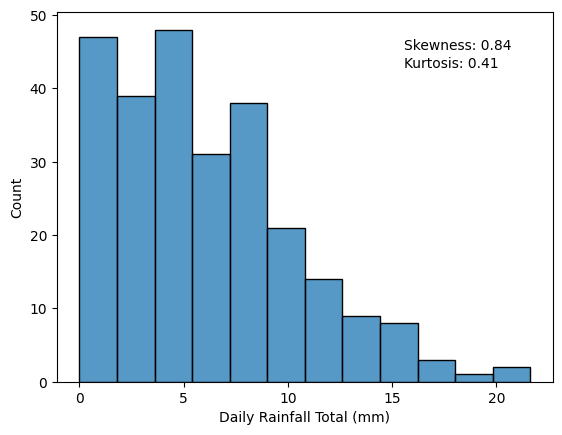

In [13]:
skewness = skew(df5['Daily Rainfall Total (mm)'])
kurt = kurtosis(df5['Daily Rainfall Total (mm)'])
# plotting histogram to check the type of distribution of Dengue Numbers
sns.histplot(df5['Daily Rainfall Total (mm)'])

# Add the skewness and kurtosis values to the plot
plt.text(x=0.7, y=0.9, s=f"Skewness: {skewness:.2f}", transform=plt.gca().transAxes)
plt.text(x=0.7, y=0.85, s=f"Kurtosis: {kurt:.2f}", transform=plt.gca().transAxes)
print("Judging from the way the graph is plotted it shows a skewed distribution specifically, it is LEFT-SIDE Skewed by 0.84 ")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Judging from the way the graph is plotted it shows a Normal Distribution pattern 


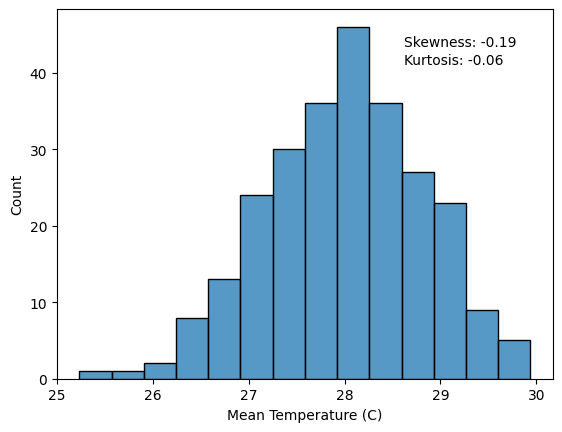

In [14]:
skewness = skew(df5['Mean Temperature (C)'])
kurt = kurtosis(df5['Mean Temperature (C)'])
# plotting histogram to check the type of distribution of Dengue Numbers
sns.histplot(df5['Mean Temperature (C)'])

# Add the skewness and kurtosis values to the plot
plt.text(x=0.7, y=0.9, s=f"Skewness: {skewness:.2f}", transform=plt.gca().transAxes)
plt.text(x=0.7, y=0.85, s=f"Kurtosis: {kurt:.2f}", transform=plt.gca().transAxes)
print("Judging from the way the graph is plotted it shows a Normal Distribution pattern ")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Judging from the way the graph is plotted it shows a skewed distribution specifically, it is LEFT-SIDE Skewed by 1.52. 


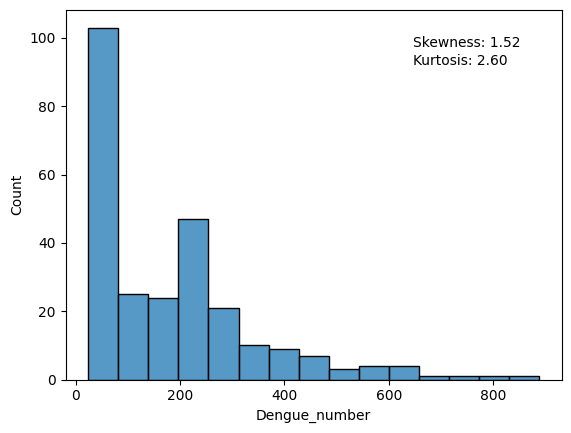

In [15]:
skewness = skew(df5['Dengue_number'])
kurt = kurtosis(df5['Dengue_number'])
# plotting histogram to check the type of distribution of Dengue Numbers
sns.histplot(df5['Dengue_number'])

# Add the skewness and kurtosis values to the plot
plt.text(x=0.7, y=0.9, s=f"Skewness: {skewness:.2f}", transform=plt.gca().transAxes)
plt.text(x=0.7, y=0.85, s=f"Kurtosis: {kurt:.2f}", transform=plt.gca().transAxes)
print("Judging from the way the graph is plotted it shows a skewed distribution specifically, it is LEFT-SIDE Skewed by 1.52. ")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

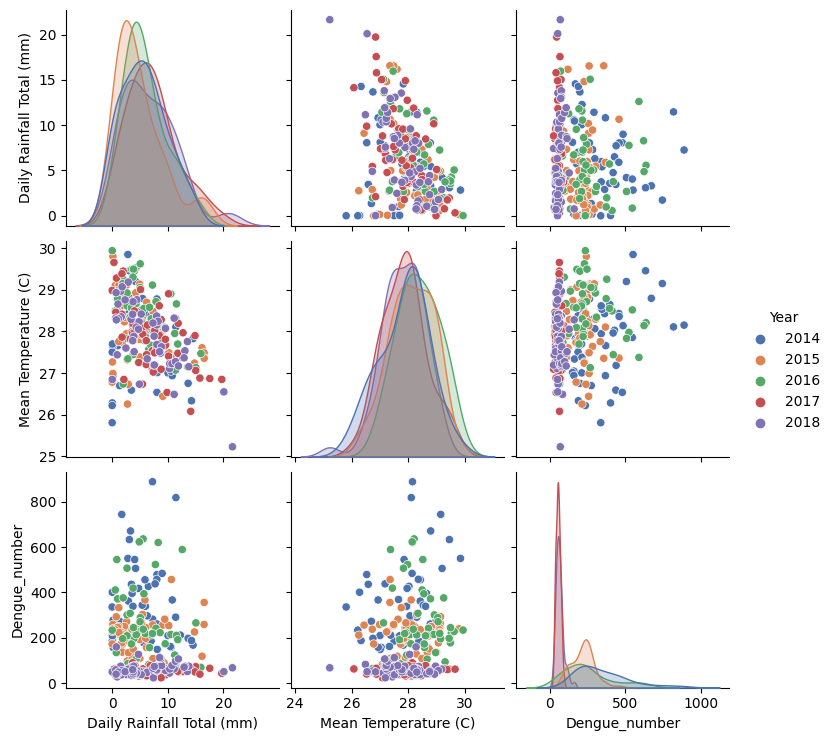

In [16]:
# Select the columns to plot
columns = ['Daily Rainfall Total (mm)', 'Mean Temperature (C)', 'Dengue_number']
# Use the pairplot function to plot the columns
sns.pairplot(df5, vars=columns, hue='Year', palette="deep")

<Axes: xlabel='Year', ylabel='Dengue_number'>

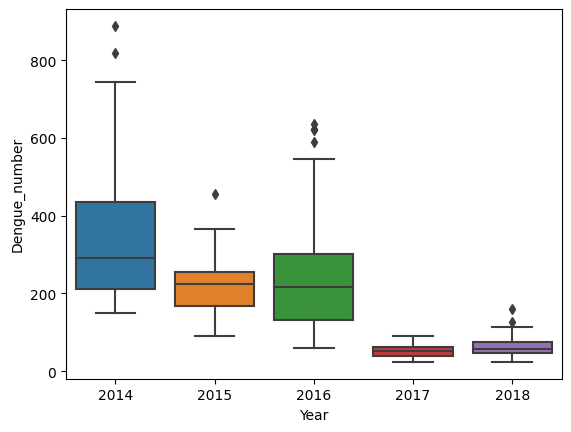

In [17]:
sns.boxplot(data= df5,x='Year', y='Dengue_number', )
# the graph below shows a sharp decrease in dengue cases in 2017 and 2018

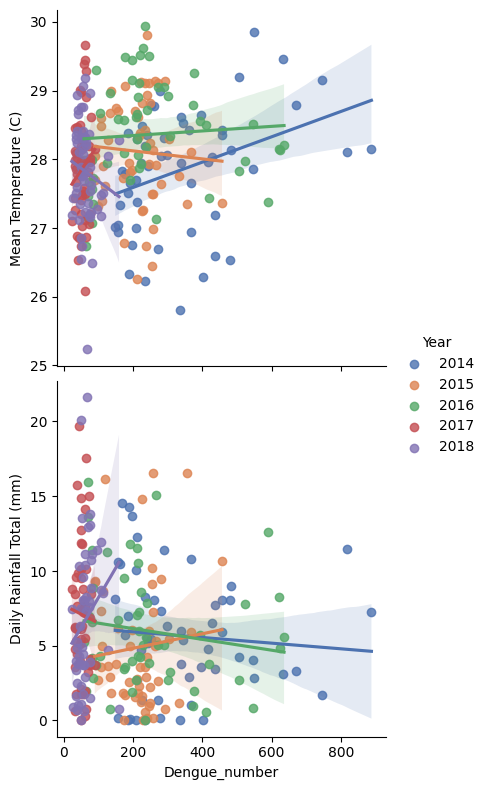

In [18]:
# Focus the visualization of Dengue_number
sns.pairplot(df5, 
             x_vars = ["Dengue_number"],
             y_vars =["Mean Temperature (C)", "Daily Rainfall Total (mm)"],
             height = 4,
             kind = "reg",
             hue='Year', palette="deep")

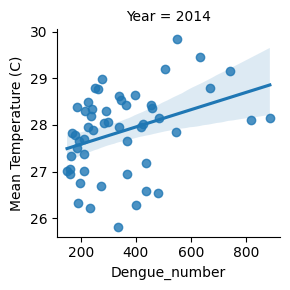

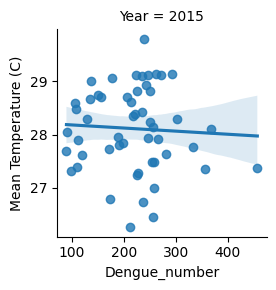

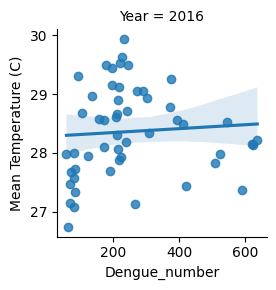

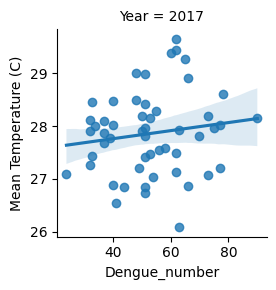

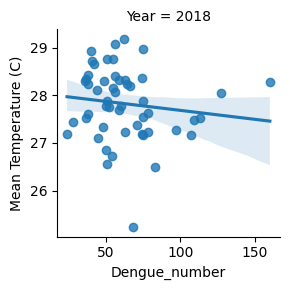

In [19]:
for i in range(2014,2019):
    filtered_df = df5.loc[(df5['Year'] == i)]
    g = sns.FacetGrid(filtered_df, col='Year')
    g.map(sns.regplot, 'Dengue_number','Mean Temperature (C)')

In [20]:
# import data
data = pd.read_csv('updated_Singapore.csv')
data.columns
clean_data = data.loc[:, ['Daily Rainfall Total (mm)', 'Mean Temperature (C)',
                           'Dengue_number']]
clean_data.columns = ['rainfall', 'temp', 'dengue'] # Use these columns to simplify description
# this means that as long as dengue > 225, it's considered an outbreak
labels = np.where(clean_data.loc[:, 'dengue'] > 225, 1, 0)
labels = list(labels)
clean_data['label'] = labels

X = clean_data.loc[:, ['rainfall', 'temp']]
y = clean_data.loc[:, 'label']
# Split train and test data with 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [21]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

# Evaluation
print("Accuracy Score : ",accuracy_score(y_test, y_pred_logreg))
print("Precision Score : ",precision_score(y_test, y_pred_logreg,average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred_logreg,average='macro'))

Accuracy Score :  0.9622641509433962
Precision Score :  0.5
Recall Score :  0.4811320754716981


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluation
print("Accuracy Score : ",accuracy_score(y_test, y_pred_tree))
print("Precision Score : ",precision_score(y_test, y_pred_tree,average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred_tree,average='macro'))

Accuracy Score :  0.5283018867924528
Precision Score :  0.5
Recall Score :  0.2641509433962264


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# calculate the mean squared error
#Use the KNN prediction as model to be tested
mse = mean_squared_error(y_test, y_pred_logreg)
# calculate the RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.19425717247145283
